In [26]:
import pandas as pd 


data = pd.read_csv('uci_malware_detection.csv')
data = data.dropna()
data = data.drop_duplicates()
data

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
369,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
370,malicious,1,0,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
371,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [30]:
x = data.drop(["Label"],axis=1)
y = data['Label'].values

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [32]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)#

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [34]:

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [35]:
from keras.models import Sequential
from keras.layers import GRU, Dense

model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(None, 1)))
model.add(Dense(1))

In [36]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
3/3 [==============================] - 2s 277ms/step - loss: 0.1737 - accuracy: 0.8142
Epoch 2/100
3/3 [==============================] - 1s 278ms/step - loss: 0.1589 - accuracy: 0.8142
Epoch 3/100
3/3 [==============================] - 1s 280ms/step - loss: 0.1448 - accuracy: 0.8142
Epoch 4/100
3/3 [==============================] - 1s 281ms/step - loss: 0.1333 - accuracy: 0.8142
Epoch 5/100
3/3 [==============================] - 1s 282ms/step - loss: 0.1240 - accuracy: 0.8142
Epoch 6/100
3/3 [==============================] - 1s 285ms/step - loss: 0.1142 - accuracy: 0.8142
Epoch 7/100
3/3 [==============================] - 1s 285ms/step - loss: 0.1054 - accuracy: 0.8142
Epoch 8/100
3/3 [==============================] - 1s 288ms/step - loss: 0.0970 - accuracy: 0.8142
Epoch 9/100
3/3 [==============================] - 1s 289ms/step - loss: 0.0893 - accuracy: 0.8142
Epoch 10/100
3/3 [==============================] - 1s 297ms/step - loss: 0.0824 - accuracy: 0.8142
Epoch 11/

3/3 [==============================] - 1s 356ms/step - loss: 0.0141 - accuracy: 0.9797
Epoch 84/100
3/3 [==============================] - 1s 363ms/step - loss: 0.0142 - accuracy: 0.9797
Epoch 85/100
3/3 [==============================] - 1s 363ms/step - loss: 0.0141 - accuracy: 0.9797
Epoch 86/100
3/3 [==============================] - 1s 361ms/step - loss: 0.0140 - accuracy: 0.9797
Epoch 87/100
3/3 [==============================] - 1s 360ms/step - loss: 0.0139 - accuracy: 0.9797
Epoch 88/100
3/3 [==============================] - 1s 360ms/step - loss: 0.0142 - accuracy: 0.9797
Epoch 89/100
3/3 [==============================] - 1s 365ms/step - loss: 0.0140 - accuracy: 0.9797
Epoch 90/100
3/3 [==============================] - 1s 356ms/step - loss: 0.0139 - accuracy: 0.9797
Epoch 91/100
3/3 [==============================] - 1s 360ms/step - loss: 0.0139 - accuracy: 0.9797
Epoch 92/100
3/3 [==============================] - 1s 360ms/step - loss: 0.0139 - accuracy: 0.9797
Epoch 93/100


In [38]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model Loss: {loss}\nModel Accuracy: {accuracy*100}")

3/3 [==============================] - 1s 112ms/step - loss: 0.0226 - accuracy: 0.9733
Model Loss: 0.0226078312844038
Model Accuracy: 97.33333587646484


In [43]:
from sklearn.metrics import classification_report

y_predict=model.predict(x_test)

y_test =le.fit_transform(y_test)
y_predict =le.fit_transform(y_predict)

report = classification_report(y_true=y_test, y_pred=y_predict)
print(report)

3/3 [==============================] - 0s 60ms/step
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        60
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall an

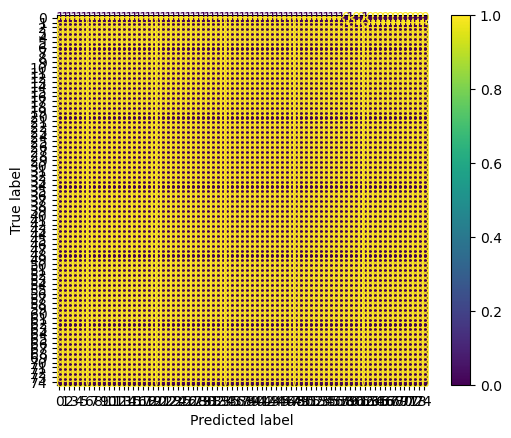

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# compute the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)

# plot the confusion matrix
cm_display.plot()
plt.show()

In [48]:
model.save("gru_malware_detection_data.h5")